# Projet 03 du parcours data scientist de Openclassrooms

## Concevez une application au service de la santé publique 

## Partie nettoyage

### objectifs

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées d’applications innovantes en lien avec l'alimentation.

Pour celà, Le jeu de données Open Food Fact est disponible sur le site officiel à l'adresse "https://fr.openfoodacts.org/". Les variables étudiées sont définies à l'adresse "https://world.openfoodfacts.org/data/data-fields.txt".

L'objectif de ce notebook est de:

1-Traiter le jeu de données afin de sélectionner les variables pertinentes pour répondre au mieux à l'objectif;

2-Automatiser les opérations pour éviter de les répéter.

### Plan

### I-Mise en place

In [1]:
#Import des modules dont on a besoin pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

#Affichage de toutes les colonnes du dataframe
pd.set_option("display.max_columns", None)

### II-La donnée brute

In [19]:
#Import et lecture du fichier
off_df_fr = pd.read_csv('datasets/fr.openfoodfacts.org.products.csv', on_bad_lines = 'skip' ,sep = '\t', low_memory = False)

In [38]:
#off_df_en = pd.read_csv('datasets/en.openfoodfacts.org.products.csv', error_bad_lines = False ,sep = '\t', header=None)

C:\Users\archi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
#Creation d'un dataframe copie qui servira pour l'analyse et conserver (préserver) le dataframe originel
off_df_fr_c = off_df_fr.copy()
#off_df_en_c = off_df_en.copy()

In [21]:
#Affichage de la forme du datafrime
print(f'off_df_fr contient {off_df_fr.shape[0]} lignes et {off_df_fr.shape[1]} colonnes')

off_df_fr contient 320772 lignes et 162 colonnes


In [39]:
#print(f'off_df_en contient {off_df_en.shape[0]} lignes et {off_df_en.shape[1]} colonnes')

off_df_en contient 2228218 lignes et 186 colonnes


In [22]:
#Observation du datafrime
off_df_fr.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [40]:
#off_df_en.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185
0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredien...,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,N

In [47]:
#off_df_fr_c = off_df_fr_c.rename(columns=off_df_fr_c.iloc[0]).drop(off_df_fr_c.index[0])

In [48]:
#off_df_fr_c.head(10)

,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,NaN,NaN
3,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1941,NaN,17.86,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.635,0.25,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017

In [23]:
off_df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [24]:
off_df_fr.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [25]:
off_df_fr.isna().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [26]:
off_df_fr.isna().mean()*100

code                         0.007170
url                          0.007170
creator                      0.000623
created_t                    0.000935
created_datetime             0.002806
                              ...    
carbon-footprint_100g       99.916452
nutrition-score-fr_100g     31.038245
nutrition-score-uk_100g     31.038245
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 162, dtype: float64

In [27]:
off_df_fr.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [28]:
off_df_fr.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
320767    False
320768    False
320769    False
320770    False
320771    False
Length: 320772, dtype: bool

In [29]:
off_df_fr.duplicated(keep=False).sum()

0

In [22]:
off_df_fr.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [31]:
off_df_fr.value_counts()

Series([], dtype: int64)

In [32]:
off_df_fr.describe()
#off_df_fr.describe().apply("{0:.2f}".format)

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [33]:
off_df_fr_trans = off_df_fr.describe().transpose()
off_df_fr_trans

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,248939.0,1.936024,2.502019,0.0,0.00,1.00,3.0,31.0
ingredients_from_palm_oil_n,248939.0,0.019659,0.140524,0.0,0.00,0.00,0.0,2.0
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,248939.0,0.055246,0.269207,0.0,0.00,0.00,0.0,6.0
...,...,...,...,...,...,...,...,...
carbon-footprint_100g,268.0,341.700764,425.211439,0.0,98.75,195.75,383.2,2842.0
nutrition-score-fr_100g,221210.0,9.165535,9.055903,-15.0,1.00,10.00,16.0,40.0
nutrition-score-uk_100g,221210.0,9.058049,9.183589,-15.0,1.00,9.00,16.0,40.0
glycemic-index_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
off_df_fr.nunique()

code                       320749
url                        320749
creator                      3535
created_t                  189567
created_datetime           189568
                            ...  
carbon-footprint_100g         202
nutrition-score-fr_100g        55
nutrition-score-uk_100g        55
glycemic-index_100g             0
water-hardness_100g             0
Length: 162, dtype: int64

<AxesSubplot:>

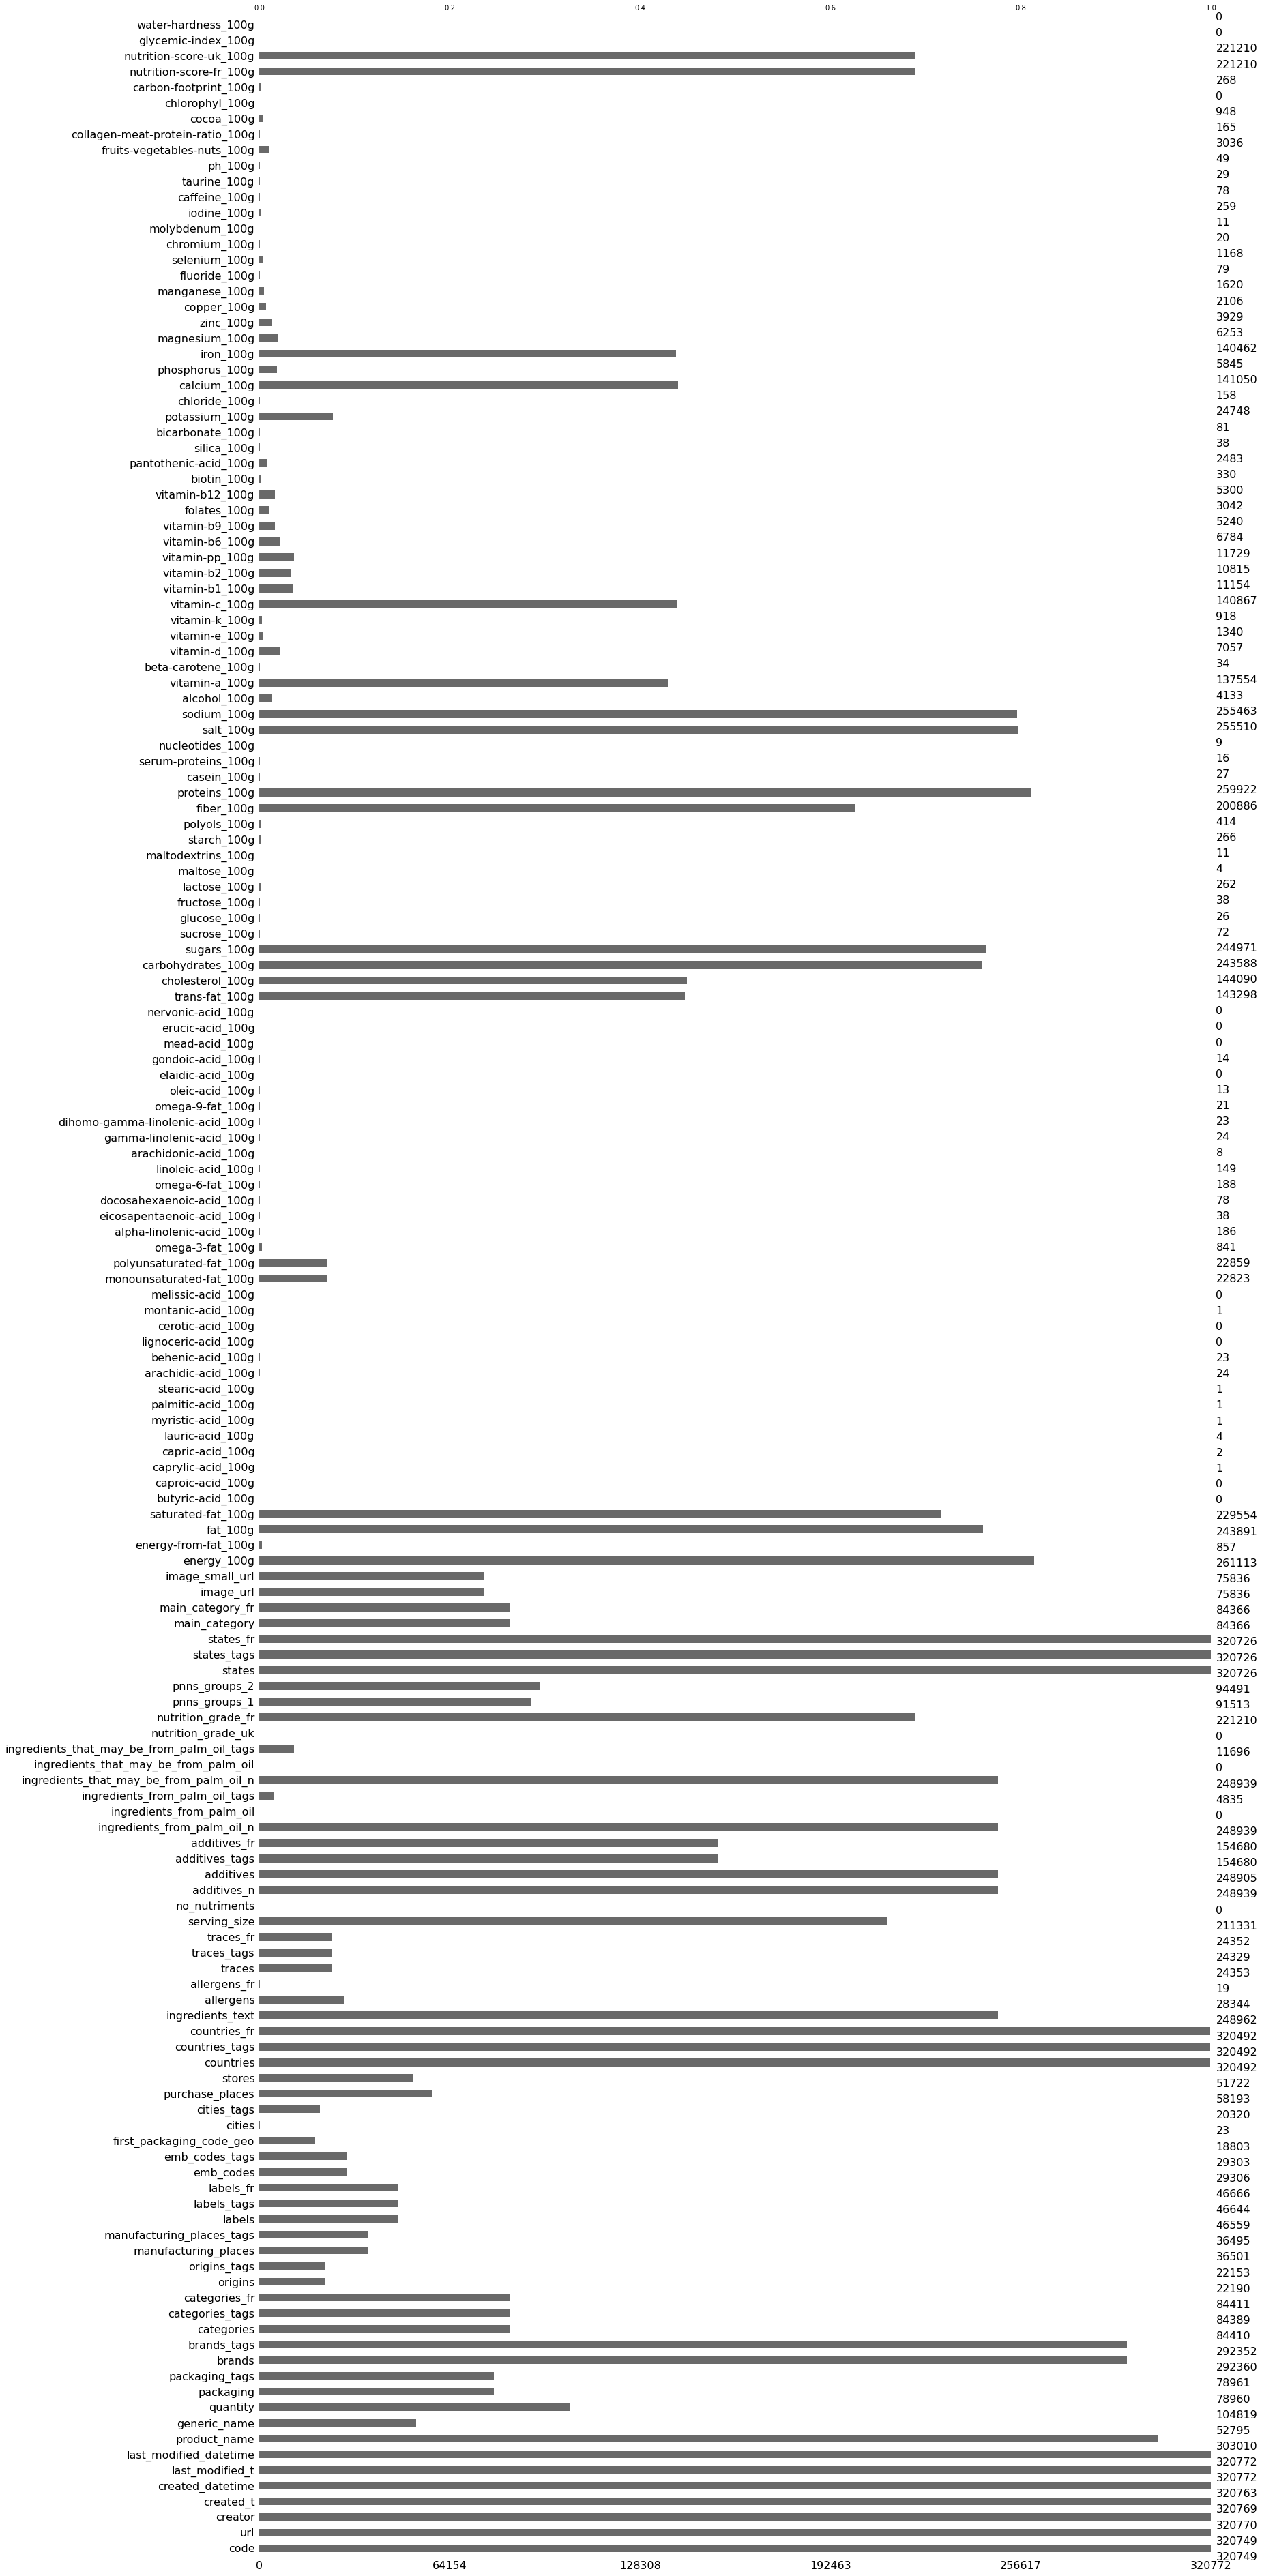

In [23]:
msn.bar(off_df_fr) #visualisation des valeurs manquantes pour chaque variable avec la librairie massigno

In [24]:
#Faire un dataframe  pour récuerer les résultats de la fonction dtypes() sous forme d'un dataframe
def columns_type(data): 
    '''fonction qui à partir d'un dataframe retourne un dataframe avec le type de chaque variable'''
    df = pd.DataFrame(data.dtypes)[0]
    summary = pd.DataFrame(columns=['Variable name', 'Variable type'])
    summary['Variable name']=data.columns
    summary['Variable type']=list(df)
    return summary

In [25]:
columns_type(off_df_fr)

,Variable name,Variable type
0,code,object
1,url,object
2,creator,object
3,created_t,object
4,created_datetime,object
...,...,...
157,carbon-footprint_100g,float64
158,nutrition-score-fr_100g,float64
159,nutrition-score-uk_100g,float64
160,glycemic-index_100g,float64


In [26]:
#Faire un dataframe qui illustre le % des valeures manquantes pour chaque variable (.isna().mean()*100)
def missing_cells(data):
    '''fonction qui à partir d'un dataframe retourne un dataframe avec pour chaque variable le nb de valeurs manquantes'''
    return data.isna().sum()

def missing_cells_percent(data):
    '''fonction qui à partir d'un dataframe retourne un dataframe avec pour chaque variable le % de valeurs manquantes'''
    return (data.isna().sum()/(data.size))*100 

def missing_values(data):
    '''fonction qui à partir d'un dataframe retourne un dataframe avec pour chaque variable, le nb de valeurs manquantes et le % de valeurs manquantes'''
    summary = pd.DataFrame(columns=['Variable name', 'Missing values', '% Missing'])
    summary['Variable name']=data.columns
    missing = list()
    percent_missing = list()
    for var in data.columns:
        nb_missing = missing_cells(data[var])
        pc_missing = missing_cells_percent(data[var])
        missing.append(nb_missing)
        percent_missing.append(pc_missing)
    summary['Missing values'] = list(missing)
    summary['% Missing'] = list(percent_missing)
    return summary

In [27]:
missing_values(off_df_fr)

,Variable name,Missing values,% Missing
0,code,23,0.007170
1,url,23,0.007170
2,creator,2,0.000623
3,created_t,3,0.000935
4,created_datetime,9,0.002806
...,...,...,...
157,carbon-footprint_100g,320504,99.916452
158,nutrition-score-fr_100g,99562,31.038245
159,nutrition-score-uk_100g,99562,31.038245
160,glycemic-index_100g,320772,100.000000


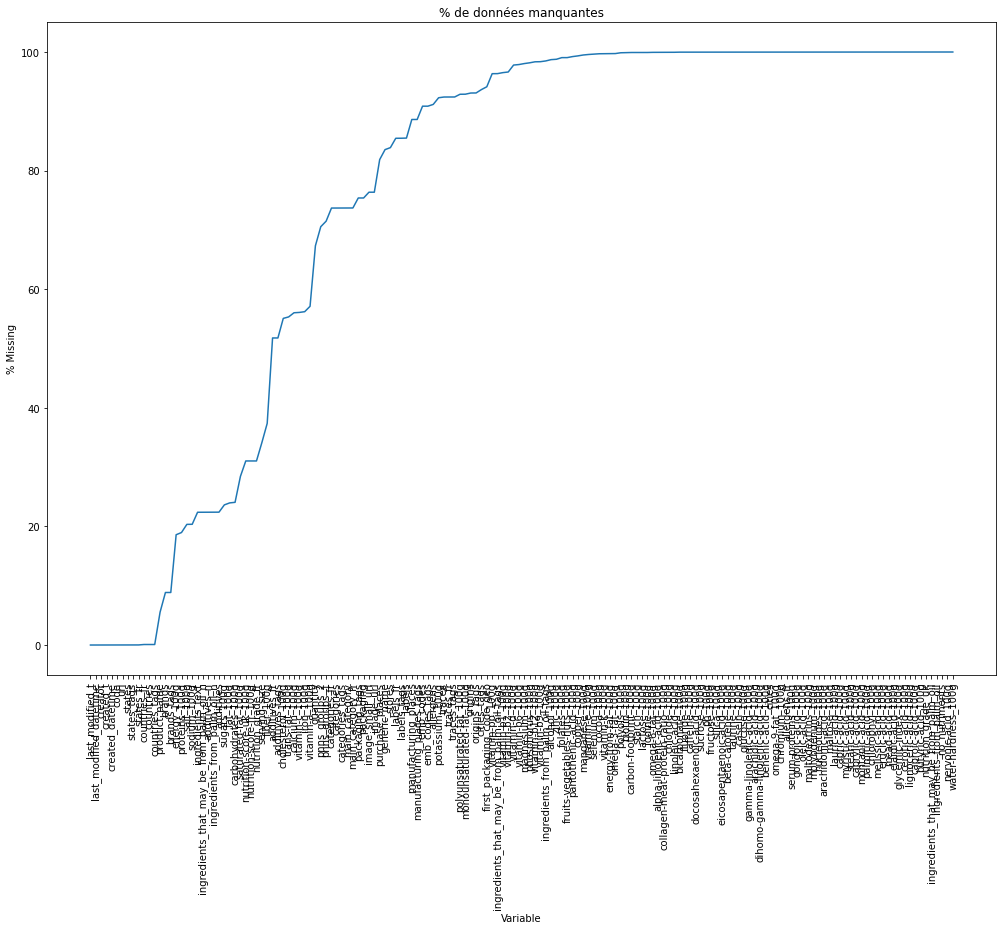

In [28]:
#Observation via un graphe le pourcentage de valeurs manquantes par variable
#Autre méthode de visualisation des valeurs manquantes pour chaque variable
to_plot = missing_values(off_df_fr).sort_values(by=['% Missing'])
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% de données manquantes')
plt.ylabel('% Missing')
plt.xlabel('Variable')
plt.plot(to_plot['Variable name'],to_plot['% Missing']);

In [29]:
#Résumé des principales informations sur le dataframe
def namestr(obj, namespace):
    '''fonction qui renvoie le nom de la variable'''
    return [name for name in namespace if namespace[name] is obj]

def nb_columns(data):
    '''fonction qui prend un dataframe en entrée et renvoie le nombre de colonnes en sortie'''
    return len(data.columns)

def nb_lines(data):
    '''fonction qui prend un dataframe en entrée et renvoie le nombre de lignes en sortie'''
    return len(data)

def missing_cells_percent(data):
    '''fonction qui prend un dataframe en entrée et renvoie le pourcentage de cellules manquantes en sortie'''
    return data.isna().sum()/(data.size)

def count_duplicates_rows(data):
    '''fonction qui prend un dataframe en entrée et renvoie le nombre de lignes en doublons en sorties'''
    return len(data)-len(data.drop_duplicates())

def count_duplicates_rows_percent(data):
    '''fonction qui prend un dataframe en entrée et renvoie le pourcentage de lignes en doublons en sorties'''
    return count_duplicates_rows(data)/nb_lines(data)

def data_set_overview(data):    
    '''fonction qui prend un dataframe et retourne un autre dataframe résumant le nb de lignes, de colonnes, de valeurs manquantes et les doublons'''
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Number of variables : {}'.format(nb_columns(data)))
    print('Number of observations : {}'.format(nb_lines(data)))
    print('Missing cells : {}'.format(missing_cells(data)))
    print('Missing cells in % : {:.2%}'.format(missing_cells_percent(data)))
    print('Duplicate rows : {}'.format(count_duplicates_rows(data)))
    print('Duplicate rows in % : {:.2%}'.format(count_duplicates_rows_percent(data)))
    return None

In [30]:
data_set_overview(off_df_fr)

--------------------------------------------------------------------------
Data : ['off_df_fr']
Number of variables : 162
Number of observations : 320772
Missing cells : code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64


TypeError: unsupported format string passed to Series.__format__

### III-Sélection des variables

In [31]:
#Prospection des variables
def dataset_variables_overview(data):
    '''fonction qui prend un dataframe en entrée et retourne un résumé contenant le nom de la variable, le type, les valeurs distinctes, les valeurs manquantes et une analyse statistiques
    pour les variables numériques'''
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('--------------------------------------------------------------------------')
    df = pd.DataFrame(columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Skew', 'Kurtosis', 'Variance', 'Stdev', 'min','25%','50%','75%','max'])
    for column in data.columns:
        var_type = data[column].dtypes
        distinct = len(data[column].unique())
        percent_distinct = len(data[column].unique())/len(data[column])
        missing = missing_cells(data[column])
        percent_missing = missing_cells_percent(data[column])
        if var_type != 'object':       
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,data[column].mean(),data[column].median(),data[column].skew(),data[column].kurtosis(),data[column].var(ddof=0),
                                          data[column].std(ddof=0),data[column].min(),data[column].quantile(0.25),data[column].quantile(0.5),data[column].quantile(0.75),data[column].max()]], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Skew', 'Kurtosis', 'Variance', 'Stdev', 'min','25%','50%','75%','max']))
        else:            
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,'','','','','','',''
                                    ,'','','','']], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Skew', 'Kurtosis', 'Variance', 'Stdev', 'min','25%','50%','75%','max']))
        return df

In [32]:
dataset_variables_overview(off_df_fr)

--------------------------------------------------------------------------
Data : ['off_df_fr']
--------------------------------------------------------------------------


,Variable name,Variable type,Distinct,% distinct,Missing,% missing,Mean,Median,Skew,Kurtosis,Variance,Stdev,min,25%,50%,75%,max
0,code,object,320750,0.999931,23,0.000072,,,,,,,,,,,


In [33]:
#Elimination des variables avec plus de 70% de valeurs manquantes
def drop_bad_column(data,limit):
    summary = missing_values(data)
    logical = list()
    for row in summary.iterrows():        
        if float(row[1]['% Missing'])>float(limit):
            #to be dropped
            print('Dropping variable {} from  {} with % missing {}'.format(row[1]['Variable name'],namestr(data, globals()),round(float(row[1]['% Missing']),2)))
            logical.append(False)
        else:
            #kept
            logical.append(True)
        
    columns_to_keep = summary[logical]['Variable name']
    
    return data[columns_to_keep]

In [47]:
new_off_df_fr = drop_bad_column(off_df_fr, 0.70)

Dropping variable generic_name from  ['off_df_fr'] with % missing 0.84
Dropping variable packaging from  ['off_df_fr'] with % missing 0.75
Dropping variable packaging_tags from  ['off_df_fr'] with % missing 0.75
Dropping variable categories from  ['off_df_fr'] with % missing 0.74
Dropping variable categories_tags from  ['off_df_fr'] with % missing 0.74
Dropping variable categories_fr from  ['off_df_fr'] with % missing 0.74
Dropping variable origins from  ['off_df_fr'] with % missing 0.93
Dropping variable origins_tags from  ['off_df_fr'] with % missing 0.93
Dropping variable manufacturing_places from  ['off_df_fr'] with % missing 0.89
Dropping variable manufacturing_places_tags from  ['off_df_fr'] with % missing 0.89
Dropping variable labels from  ['off_df_fr'] with % missing 0.85
Dropping variable labels_tags from  ['off_df_fr'] with % missing 0.85
Dropping variable labels_fr from  ['off_df_fr'] with % missing 0.85
Dropping variable emb_codes from  ['off_df_fr'] with % missing 0.91
Dr

In [48]:
new_off_df_fr.shape

(320772, 43)

In [36]:
new_off_df_fr.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [49]:
new_off_df_fr.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                   object
created_datetime                            object
last_modified_t                             object
last_modified_datetime                      object
product_name                                object
quantity                                    object
brands                                      object
brands_tags                                 object
countries                                   object
countries_tags                              object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
additives_tags                              object
additives_fr                   

In [37]:
data_set_overview(new_off_df_fr)

--------------------------------------------------------------------------
Data : ['new_off_df_fr']
Number of variables : 43
Number of observations : 320772
Missing cells : code                                           23
url                                            23
creator                                         2
created_t                                       3
created_datetime                                9
last_modified_t                                 0
last_modified_datetime                          0
product_name                                17762
quantity                                   215953
brands                                      28412
brands_tags                                 28420
countries                                     280
countries_tags                                280
countries_fr                                  280
ingredients_text                            71810
serving_size                               109441
additives_n                

TypeError: unsupported format string passed to Series.__format__

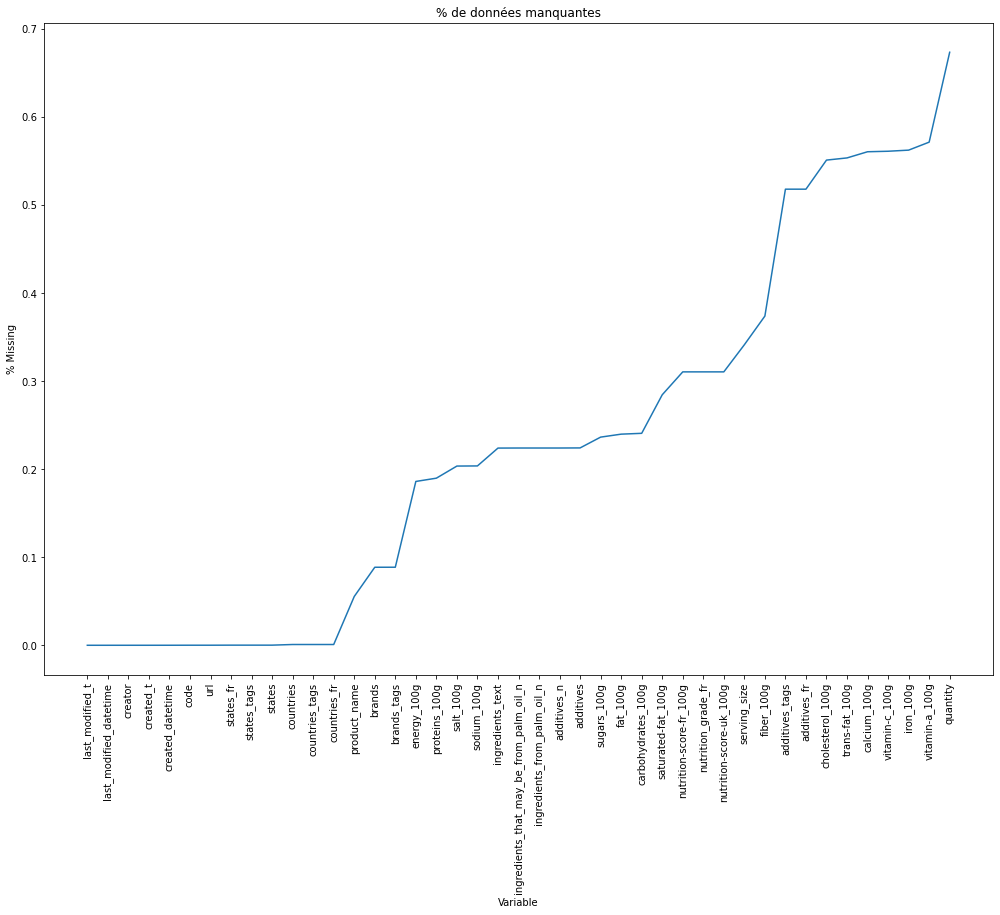

In [38]:
#Observation via un graphe le pourcentage de valeurs manquantes par variable pour le nouveau dataframe
post_proc_ = missing_values(new_off_df_fr).sort_values(by=['% Missing'])
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.title('% de données manquantes')
plt.ylabel('% Missing')
plt.xlabel('Variable')
degrees = 90
plt.xticks(rotation=degrees)
plt.plot(post_proc_['Variable name'],post_proc_['% Missing']);

<AxesSubplot:>

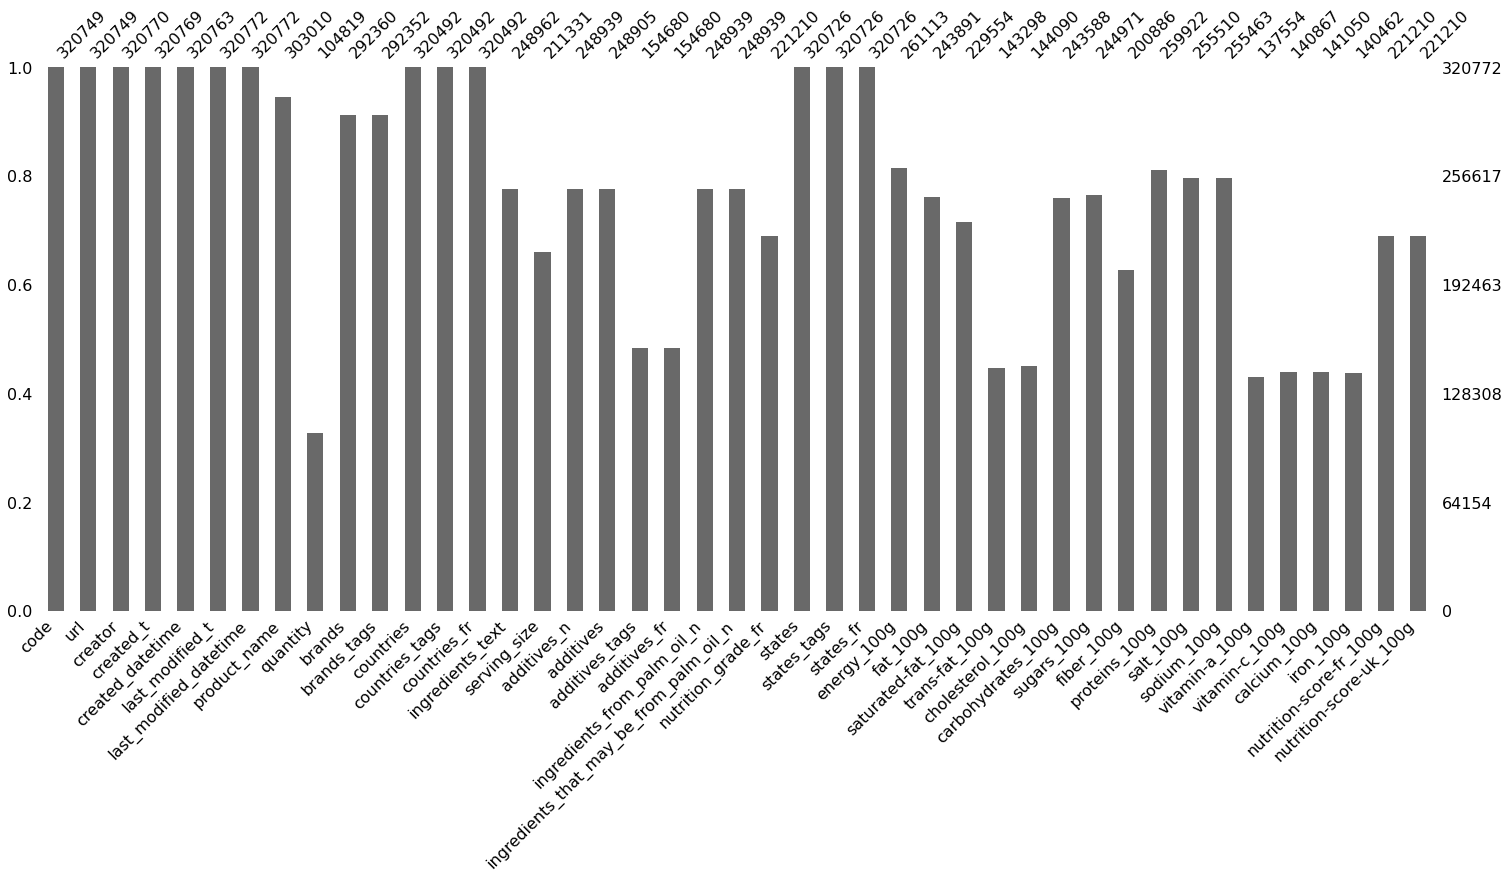

In [39]:
msn.bar(new_off_df_fr)

In [40]:
missing_values(new_off_df_fr).sort_values(by=['% Missing'])

,Variable name,Missing values,% Missing
5,last_modified_t,0,0.000000
6,last_modified_datetime,0,0.000000
2,creator,2,0.000006
3,created_t,3,0.000009
4,created_datetime,9,0.000028
0,code,23,0.000072
1,url,23,0.000072
25,states_fr,46,0.000143
24,states_tags,46,0.000143
23,states,46,0.000143


In [41]:
new_off_df_fr[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g','cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g','nutrition-score-fr_100g']].head(4)

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,0.00000,0.000,14.0
2,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,0.63500,0.250,0.0
3,0.0,0.0,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,1.22428,0.482,12.0


### IV-Un jeu de données nettoyé

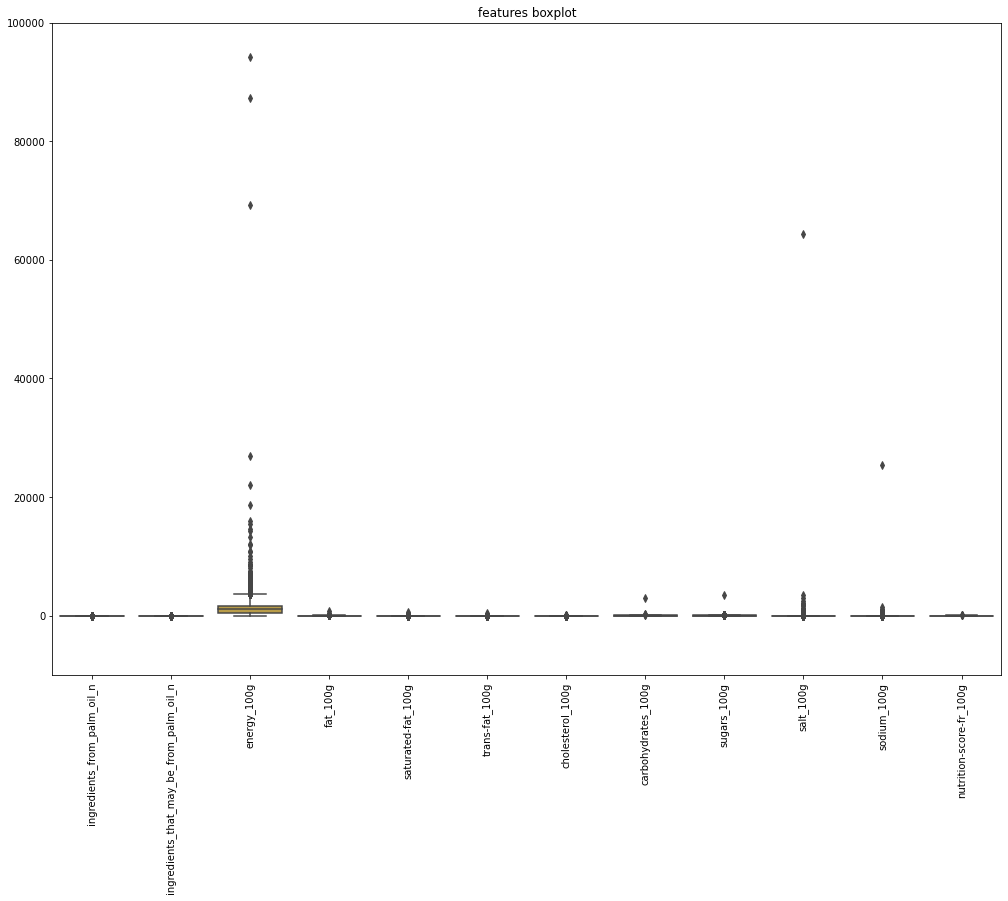

In [42]:
#Nettoyer les données en excluant les valeurs dites outliers
#Visualisation des outliers dans l'ensemble
indicateurs = ['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']
degrees = 90
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=degrees)
ax.set_ylim([-1e4,1e5])
sns.boxplot(data=new_off_df_fr[indicateurs]).set_title('features boxplot');

C:\Users\archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\archi\anaconda3\lib\si

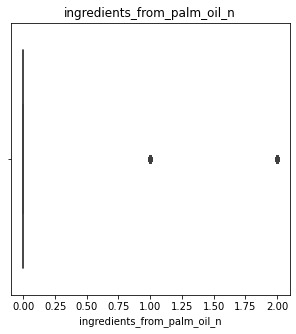

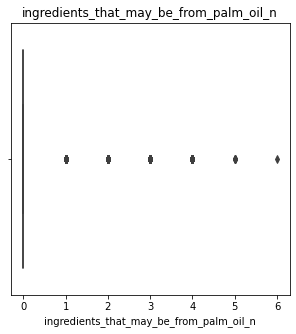

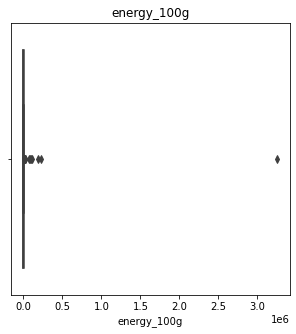

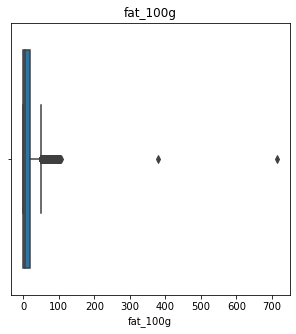

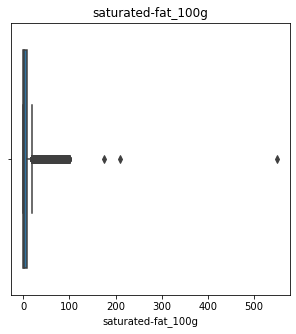

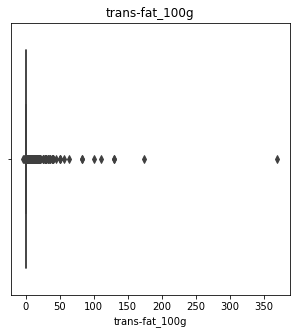

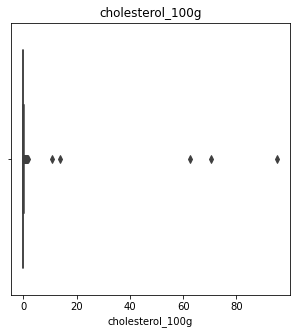

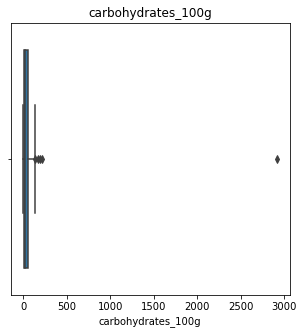

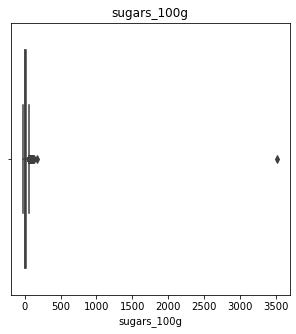

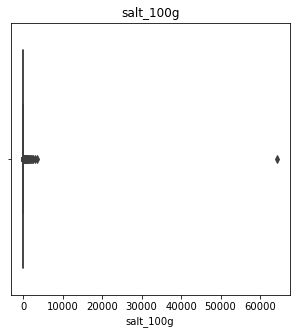

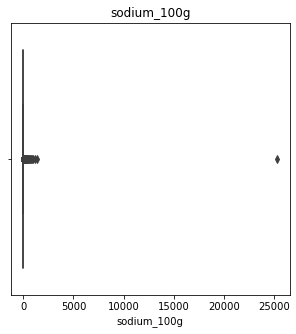

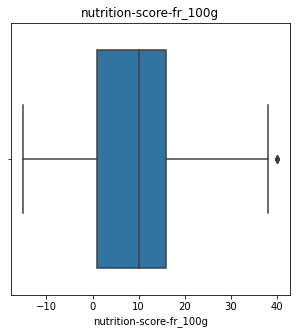

In [43]:
#Visualisation des outliers pour chaque indicateurs
for i in indicateurs:
    plt.figure(figsize=(5,5));
    sns.boxplot(new_off_df_fr[i]).set_title(i)

In [11]:
idx = np.where((new_off_df_fr['energy_100g'] < 3) & (new_off_df_fr[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','fat_100g','saturated-fat_100g','trans-fat_100g']] < 300) & (new_off_df_fr['cholesterol_100g'] < 40) & (new_off_df_fr_c[['carbohydrates_100g', 'sugars_100g']] < 2500) & (new_off_df_fr_c['salt_100g'] < 10000))

MemoryError: Unable to allocate 767. GiB for an array with shape (320772, 320772) and data type float64

In [49]:
new_off_df_fr = new_off_df_fr[(new_off_df_fr.loc[:, indicateurs] < 2500).all(axis=1)]

In [50]:
new_off_df_fr = new_off_df_fr[(new_off_df_fr.loc[:, indicateurs] >= 0).all(axis=1)]

In [51]:
new_off_df_fr.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,105675.000000,107584.000000,107584.000000,107584.000000,103188.000000,103217.000000,103848.000000,104157.000000,107584.000000,107584.000000
mean,2.273340,0.000204,0.027402,1247.055466,13.633046,5.180988,0.070373,0.020444,37.271230,18.200627,2.363310,7.600628,1.676839,0.660173,0.000125,0.006375,0.109941,0.002451,11.692835,11.690856
std,2.643628,0.014299,0.165907,689.491826,13.304933,6.451136,1.039947,0.348976,28.520916,20.866429,3.730018,8.298675,14.263537,5.615563,0.000529,0.116511,2.358439,0.161569,7.765845,7.767894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,0.000000,-0.002100,0.000000,-0.000260,0.000000,-3.000000
25%,0.000000,0.000000,0.000000,640.000000,1.220000,0.000000,0.000000,0.000000,9.520000,2.040000,0.000000,1.670000,0.210820,0.083000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,2.000000,0.000000,0.000000,1343.000000,10.290000,2.940000,0.000000,0.000000,32.560000,8.870000,1.000000,5.000000,0.886460,0.349000,0.000000,0.000000,0.035000,0.000900,12.000000,12.000000
75%,3.000000,0.000000,0.000000,1795.000000,22.730000,7.890000,0.000000,0.026000,62.500000,30.000000,3.300000,10.530000,1.633220,0.643000,0.000107,0.002100,0.107000,0.002250,18.000000,18.000000
max,31.000000,1.000000,3.000000,2498.000000,100.000000,83.330000,173.260000,95.238000,100.000000,100.000000,100.000000,100.000000,2452.413180,965.517000,0.051818,35.714300,694.737000,50.000000,36.000000,36.000000


In [27]:
#new_off_df_fr[(new_off_df_fr.loc[:, indicateurs] > 0).all(axis=1)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [ ]:
#Si présence de outliers appliquer ce qui suit (erreur, creation d'un nouveau dataframe à chaque fois)
new_off_df_fr_c = new_off_df_fr_c[new_off_df_fr_c['energy_100g'] < 3]
new_off_df_fr_c = new_off_df_fr_c[new_off_df_fr_c[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','fat_100g','saturated-fat_100g','trans-fat_100g']] < 300]
new_off_df_fr_c = new_off_df_fr_c[new_off_df_fr_c['cholesterol_100g'] < 40]
new_off_df_fr_c = new_off_df_fr_c[new_off_df_fr_c[['carbohydrates_100g', 'sugars_100g']] < 2500]
new_off_df_fr_c = new_off_df_fr_c[new_off_df_fr_c['salt_100g'] < 10000]
new_off_df_fr_c = new_off_df_fr_c[new_off_df_fr_c[indicateurs] > 0]

In [52]:
new_off_df_fr

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.00000,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.00000,0.0000,0.071,0.00129,0.0,0.0
77,0000000033640,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489050424,2017-03-09T09:07:04Z,1489050425,2017-03-09T09:07:05Z,Granola Cranberry And Acai,NaN,Viva La Salud,viva-la-salud,US,en:united-states,États-Unis,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,NaN,NaN,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1824.0,10.91,0.91,0.0,0.000,74.55,25.45,5.5,9.09,0.25400,0.100,0.00000,0.0000,0.036,0.00262,6.0,6.0
80,0000000033688,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489050424,2017-03-09T09:07:04Z,1489050424,2017-03-09T09:07:04Z,"Peanuts, Mixed Nuts",NaN,Northgate Market,northgate-market,US,en:united-states,États-Unis,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,[ peanuts -> en:peanuts ] [ honey -> en:hon...,en:e415,E415 - Gomme xanthane,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2389.0,42.86,7.14,0.0,0.000,25.00,14.29,7.1,25.00,0.54356,0.214,0.00000,0.0000,0.071,0.00514,14.0,14.0
146,0000000043595,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489050424,2017-03-09T09:07:04Z,1489050424,2017-03-09T09:07:04Z,Cranberries,NaN,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,[ cranberries -> en:cranberries ] [ sugar -...,NaN,NaN,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1255.0,0.00,0.00,0.0,0.000,83.33,66.67,10.0,0.00,0.00000,0.000,0.00000,0.0000,0.000,0.00000,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320663,956088003170,http://world-fr.openfoodfacts.org/produit/9560...,usda-ndb-import,1489141262,2017-0

In [ ]:
new_off_df_fr = new_off_df_fr[new_off_df_fr[indicateurs] < 2500]
#new_off_df_fr = new_off_df_fr[new_off_df_fr[indicateurs] > 0]
#new_off_df_fr = new_off_df_fr[0 < new_off_df_fr[indicateurs] < 2500]

In [53]:
new_off_df_fr.isna().mean()*100

code                                        0.000000
url                                         0.000000
creator                                     0.000000
created_t                                   0.000000
created_datetime                            0.000000
last_modified_t                             0.000000
last_modified_datetime                      0.000000
product_name                                0.040898
quantity                                   99.184823
brands                                      0.540973
brands_tags                                 0.540973
countries                                   0.000000
countries_tags                              0.000000
countries_fr                                0.000000
ingredients_text                            0.000000
serving_size                                0.011154
additives_n                                 0.000000
additives                                   0.004648
additives_tags                             27.

In [54]:
new_off_df_fr = new_off_df_fr[['code','url','creator','last_modified_datetime', 'product_name', 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']]

In [55]:
new_off_df_fr

,code,url,creator,last_modified_datetime,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,0.00000,0.000,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T14:32:37Z,Peanuts,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,0.63500,0.250,0.0
77,0000000033640,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T09:07:05Z,Granola Cranberry And Acai,0.0,0.0,1824.0,10.91,0.91,0.0,0.000,74.55,25.45,0.25400,0.100,6.0
80,0000000033688,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T09:07:04Z,"Peanuts, Mixed Nuts",0.0,0.0,2389.0,42.86,7.14,0.0,0.000,25.00,14.29,0.54356,0.214,14.0
146,0000000043595,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T09:07:04Z,Cranberries,0.0,0.0,1255.0,0.00,0.00,0.0,0.000,83.33,66.67,0.00000,0.000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320663,956088003170,http://world-fr.openfoodfacts.org/produit/9560...,usda-ndb-import,2017-03-10T10:21:02Z,Blueberry Chia Buckwheat Muesli,0.0,0.0,1690.0,10.53,4.39,0.0,0.000,66.67,15.79,0.04572,0.018,7.0
320664,95656335,http://world-fr.openfoodfacts.org/produit/9565...,usda-ndb-import,2017-03-09T11:34:38Z,Chipotle Peppers In Adobo Sauce,0.0,0.0,280.0,0.00,0.00,0.0,0.000,16.67,6.67,3.21818,1.267,6.0
320665,95659305,http://world-fr.openfoodfacts.org/produit/9565...,usda-ndb-import,2017-03-09T09:34:54Z,Dal Makhani,0.0,0.0,502.0,5.33,1.00,0.0,0.007,13.33,0.00,1.37160,0.540,2.0
320738,9780803738782,http://world-fr.openfoodfacts.org/produit/9780...,usda-ndb-import,2017-03-09T14:32:25Z,Organic Z Bar,0.0,0.0,1393.0,9.72,2.78,0.0,0.000,61.11,30.56,0.95250,0.375,11.0


In [56]:
new_off_df_fr['last_modified_datetime'] = pd.to_datetime(new_off_df_fr['last_modified_datetime'])

C:\Users\archi\AppData\Local\Temp/ipykernel_16316/2598797592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_off_df_fr['last_modified_datetime'] = pd.to_datetime(new_off_df_fr['last_modified_datetime'])


In [57]:
new_off_df_fr.dtypes

code                                                    object
url                                                     object
creator                                                 object
last_modified_datetime                     datetime64[ns, UTC]
product_name                                            object
ingredients_from_palm_oil_n                            float64
ingredients_that_may_be_from_palm_oil_n                float64
energy_100g                                            float64
fat_100g                                               float64
saturated-fat_100g                                     float64
trans-fat_100g                                         float64
cholesterol_100g                                       float64
carbohydrates_100g                                     float64
sugars_100g                                            float64
salt_100g                                              float64
sodium_100g                                            

In [58]:
new_off_df_fr

,code,url,creator,last_modified_datetime,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,0.00000,0.000,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,Peanuts,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,0.63500,0.250,0.0
77,0000000033640,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:05+00:00,Granola Cranberry And Acai,0.0,0.0,1824.0,10.91,0.91,0.0,0.000,74.55,25.45,0.25400,0.100,6.0
80,0000000033688,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:04+00:00,"Peanuts, Mixed Nuts",0.0,0.0,2389.0,42.86,7.14,0.0,0.000,25.00,14.29,0.54356,0.214,14.0
146,0000000043595,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:04+00:00,Cranberries,0.0,0.0,1255.0,0.00,0.00,0.0,0.000,83.33,66.67,0.00000,0.000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320663,956088003170,http://world-fr.openfoodfacts.org/produit/9560...,usda-ndb-import,2017-03-10 10:21:02+00:00,Blueberry Chia Buckwheat Muesli,0.0,0.0,1690.0,10.53,4.39,0.0,0.000,66.67,15.79,0.04572,0.018,7.0
320664,95656335,http://world-fr.openfoodfacts.org/produit/9565...,usda-ndb-import,2017-03-09 11:34:38+00:00,Chipotle Peppers In Adobo Sauce,0.0,0.0,280.0,0.00,0.00,0.0,0.000,16.67,6.67,3.21818,1.267,6.0
320665,95659305,http://world-fr.openfoodfacts.org/produit/9565...,usda-ndb-import,2017-03-09 09:34:54+00:00,Dal Makhani,0.0,0.0,502.0,5.33,1.00,0.0,0.007,13.33,0.00,1.37160,0.540,2.0
320738,9780803738782,http://world-fr.openfoodfacts.org/produit/9780...,usda-ndb-import,2017-03-09 14:32:25+00:00,Organic Z Bar,0.0,0.0,1393.0,9.72,2.78,0.0,0.000,61.11,30.56,0.95250,0.375,11.0


In [59]:
new_off_df_fr.isna().mean()*100

code                                       0.000000
url                                        0.000000
creator                                    0.000000
last_modified_datetime                     0.000000
product_name                               0.040898
ingredients_from_palm_oil_n                0.000000
ingredients_that_may_be_from_palm_oil_n    0.000000
energy_100g                                0.000000
fat_100g                                   0.000000
saturated-fat_100g                         0.000000
trans-fat_100g                             0.000000
cholesterol_100g                           0.000000
carbohydrates_100g                         0.000000
sugars_100g                                0.000000
salt_100g                                  0.000000
sodium_100g                                0.000000
nutrition-score-fr_100g                    0.000000
dtype: float64

<AxesSubplot:>

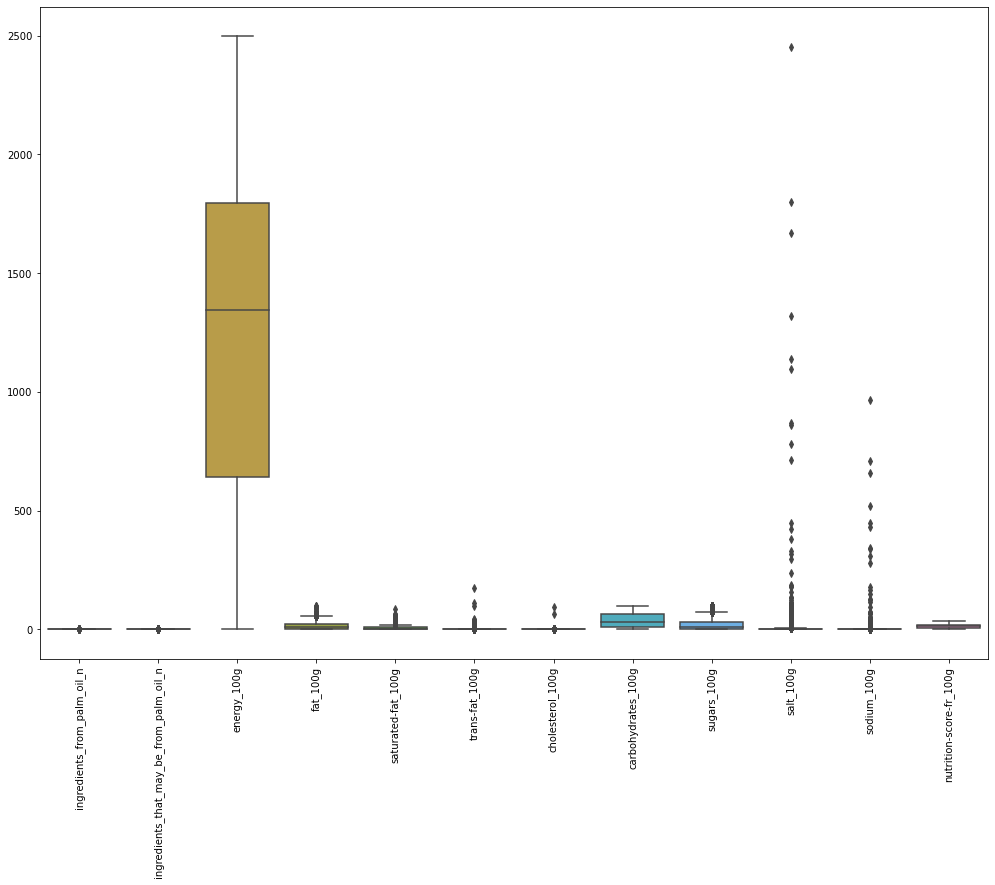

In [60]:
#Visualisation des données aprés une élimination de potentiels outliers 
degrees = 90
fig = plt.figure(figsize=(17, 12))
plt.xticks(rotation=degrees)
sns.boxplot(data=new_off_df_fr[indicateurs])

In [35]:
new_off_df_fr.shape

(320772, 43)

In [63]:
#Choisir bonne méthode pour combler les valeurs manquantes (0, moyenne, mediane, voir si valeur suit une certaine logique)
#.fillna()

#new_off_df_fr = new_off_df_fr.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('.'))

#for i in new_off_df_fr.columns[new_off_df_fr.isnull().any(axis=0)]: 
#    new_off_df_fr[i].fillna(new_off_df_fr[i].mean(), inplace=True)

#new_off_df_fr_c = new_off_df_fr [['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g', 'fat_100g',
#       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
#       'carbohydrates_100g', 'sugars_100g','salt_100g']].fillna(new_off_df_fr[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g', 'fat_100g',
#       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
#       'carbohydrates_100g', 'sugars_100g','salt_100g']].mean())

#new_off_df_fr.fillna(new_off_df_fr.mean(), inplace = True)

#La solution (prend bcp de temps)
#str_cols = new_off_df_fr.columns[new_off_df_fr.dtypes==object]
#new_off_df_fr[str_cols] = new_off_df_fr[str_cols].fillna('.')
#new_off_df_fr = new_off_df_fr.fillna(new_off_df_fr.mean())

new_off_df_fr = new_off_df_fr.fillna(0)

#test = new_off_df_fr.loc[:,['salt_100g']].copy()

#test.fillna(test.mean(), inplace = True)

In [61]:
#test.shape

NameError: name 'test' is not defined

In [57]:
#test.isna().sum()

salt_100g    0
dtype: int64

In [50]:
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     500 non-null    object 
 1   url                                      500 non-null    object 
 2   creator                                  500 non-null    object 
 3   created_t                                500 non-null    object 
 4   created_datetime                         500 non-null    object 
 5   last_modified_t                          500 non-null    object 
 6   last_modified_datetime                   500 non-null    object 
 7   product_name                             479 non-null    object 
 8   quantity                                 83 non-null     object 
 9   brands                                   443 non-null    object 
 10  brands_tags                              443 non-n

In [64]:
new_off_df_fr.head(20)

,code,url,creator,last_modified_datetime,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),0.0,0.0,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,0.00000,0.000,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,Peanuts,0.0,0.0,1941.0,17.86,0.000,0.000,0.00000,60.71,17.860,0.63500,0.250,0.0
77,0000000033640,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:05+00:00,Granola Cranberry And Acai,0.0,0.0,1824.0,10.91,0.910,0.000,0.00000,74.55,25.450,0.25400,0.100,6.0
80,0000000033688,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:04+00:00,"Peanuts, Mixed Nuts",0.0,0.0,2389.0,42.86,7.140,0.000,0.00000,25.00,14.290,0.54356,0.214,14.0
146,0000000043595,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:04+00:00,Cranberries,0.0,0.0,1255.0,0.00,0.000,0.000,0.00000,83.33,66.670,0.00000,0.000,8.0
147,0000000045292,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:38+00:00,Turkish Apricots,0.0,0.0,1046.0,0.00,0.000,0.000,0.00000,62.50,52.500,0.00000,0.000,8.0
148,0000000045308,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:03+00:00,Banana Chips Sweetened,0.0,0.0,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,0.00000,0.000,14.0
149,0000000045346,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:38+00:00,Granola Honey Almonds,0.0,0.0,1674.0,14.55,2.730,0.000,0.00000,60.00,21.820,0.11430,0.045,0.0
150,0000000045421,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,Chili Mango,0.0,0.0,1569.0,2.50,0.000,0.000,0.00000,87.50,65.000,1.96850,0.775,19.0
151,0000000045483,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:04+00:00,Milk Chocolate Pretzels,0.0,0.0,1883.0,22.50,12.500,0.000,0.01200,70.00,42.500,1.01600,0.400,25.0


In [12]:
def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna(0)
    elif series.dtype is pd.np.dtype(object):
        return series.fillna('.')
    else:
        return series

In [13]:
new_off_df_fr = new_off_df_fr.apply(myfillna)

C:\Users\archi\AppData\Local\Temp/ipykernel_3132/3916989040.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if series.dtype is pd.np.dtype(float):
C:\Users\archi\AppData\Local\Temp/ipykernel_3132/3916989040.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  elif series.dtype is pd.np.dtype(object):


In [59]:
#new_off_df_fr_c.head(4)
new_off_df_fr

,code,url,creator,last_modified_datetime,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,0.00000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,Peanuts,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,0.63500
77,0000000033640,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:05+00:00,Granola Cranberry And Acai,0.0,0.0,1824.0,10.91,0.91,0.0,0.000,74.55,25.45,0.25400
80,0000000033688,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:04+00:00,"Peanuts, Mixed Nuts",0.0,0.0,2389.0,42.86,7.14,0.0,0.000,25.00,14.29,0.54356
146,0000000043595,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 09:07:04+00:00,Cranberries,0.0,0.0,1255.0,0.00,0.00,0.0,0.000,83.33,66.67,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320664,95656335,http://world-fr.openfoodfacts.org/produit/9565...,usda-ndb-import,2017-03-09 11:34:38+00:00,Chipotle Peppers In Adobo Sauce,0.0,0.0,280.0,0.00,0.00,0.0,0.000,16.67,6.67,3.21818
320665,95659305,http://world-fr.openfoodfacts.org/produit/9565...,usda-ndb-import,2017-03-09 09:34:54+00:00,Dal Makhani,0.0,0.0,502.0,5.33,1.00,0.0,0.007,13.33,0.00,1.37160
320738,9780803738782,http://world-fr.openfoodfacts.org/produit/9780...,usda-ndb-import,2017-03-09 14:32:25+00:00,Organic Z Bar,0.0,0.0,1393.0,9.72,2.78,0.0,0.000,61.11,30.56,0.95250
320742,9787461062105,http://world-fr.openfoodfacts.org/produit/9787...,usda-ndb-import,2017-03-09 20:45:00+00:00,Natural Cassava,0.0,0.0,1477.0,0.00,0.00,0.0,0.000,87.06,2.35,0.03048


In [65]:
new_off_df_fr.isna().mean()*100

code                                       0.0
url                                        0.0
creator                                    0.0
last_modified_datetime                     0.0
product_name                               0.0
ingredients_from_palm_oil_n                0.0
ingredients_that_may_be_from_palm_oil_n    0.0
energy_100g                                0.0
fat_100g                                   0.0
saturated-fat_100g                         0.0
trans-fat_100g                             0.0
cholesterol_100g                           0.0
carbohydrates_100g                         0.0
sugars_100g                                0.0
salt_100g                                  0.0
sodium_100g                                0.0
nutrition-score-fr_100g                    0.0
dtype: float64

In [66]:
new_off_df_fr.describe()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000,107584.000000
mean,0.000204,0.027402,1247.055466,13.633046,5.180988,0.070373,0.020444,37.271230,18.200627,1.676839,0.660173,11.692835
std,0.014299,0.165907,689.491826,13.304933,6.451136,1.039947,0.348976,28.520916,20.866429,14.263537,5.615563,7.765845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,640.000000,1.220000,0.000000,0.000000,0.000000,9.520000,2.040000,0.210820,0.083000,4.000000
50%,0.000000,0.000000,1343.000000,10.290000,2.940000,0.000000,0.000000,32.560000,8.870000,0.886460,0.349000,12.000000
75%,0.000000,0.000000,1795.000000,22.730000,7.890000,0.000000,0.026000,62.500000,30.000000,1.633220,0.643000,18.000000
max,1.000000,3.000000,2498.000000,100.000000,83.330000,173.260000,95.238000,100.000000,100.000000,2452.413180,965.517000,36.000000


In [67]:
#Si tout est bon, garder le dataframe pour le seconde étape du projet
new_off_df_fr.to_csv('clean_df_fr.csv', sep = ',', index = True)

### V-Conclusion 